In [2]:
import numpy as np
from numpy import random as rand
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy.time import Time
import astropy.units as u
from astropy import constants as c
from linetools.spectra import utils as ltsu
from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.analysis import utils as ltau
from array import array
from scipy import stats as stat
from scipy.optimize import curve_fit
%matplotlib inline

In [6]:
#1 / R = Δλ / λ = v / c

del_lam = 4*u.AA

lam = 4000*u.AA

R = lam/del_lam

dv = 299792/R #km/s

dv

<Quantity 299.792>

In [5]:
tup = ((LBG.wavelength[615:642]/u.AA),LBG.flux[615:642], LBG.sig[615:642])

x_fit = (ltau.gaussian_ew(tup, "emission"))

x_sigma = x_fit.value

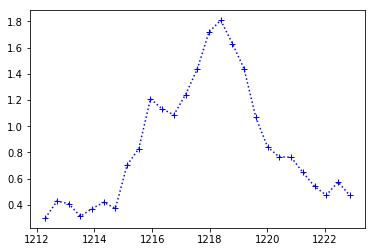

In [6]:
x1 = np.array(LBG.wavelength[615:642]/u.AA)

y1 = np.array(LBG.flux[615:642])

plt.plot(x1, y1, 'b+:', label='data')
plt.show()

In [7]:
def Gauss(x, a, x0, sigma):
    
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

In [8]:
mean = sum(x1 * y1) / sum(y1)

sigma =  np.median(LBG.sig[615:642])

In [9]:
popt,pcov = curve_fit(Gauss, x1, y1, p0=[max(y1), mean, sigma])

lin = np.linspace(x1[0],x1[-1],100)

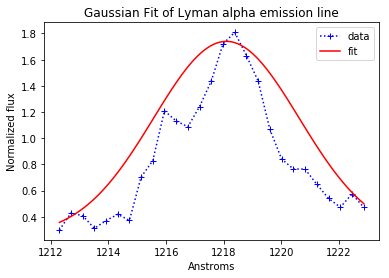

In [10]:
plt.plot(x1, y1, 'b+:', label='data')
plt.plot(lin, Gauss(lin, *popt)+.25, 'r-', label='fit')

plt.title('Gaussian Fit of Lyman alpha emission line')
plt.xlabel('Anstroms')
plt.ylabel('Normalized flux')
plt.legend()
plt.show()

In [11]:
g_lin = Gauss(lin, *popt)+.25

In [12]:
g_mean = sum(lin * g_lin) / sum(g_lin)

g_sigma = np.sqrt(sum(g_lin * (lin - g_mean)**2) / sum(g_lin))

In [13]:
my_fwhm = 2*np.sqrt(2*np.log(2))*g_sigma

my_dis = my_fwhm/3.418/1550*2.99E5

my_dv = my_dis/2.35

In [14]:
x_fwhm = 2*np.sqrt(2*np.log(2))*x_sigma

x_dis = x_fwhm/3.418/1550*2.99E5

x_dv = x_dis/2.35

In [15]:
print(my_dv, x_dv)

140.206927735 164.22948734
